In [0]:
import os; os.chdir('/content/drive/My Drive/Colab Notebooks/Lazy courses/NLP2')

In [0]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD, PCA, KernelPCA
from datetime import datetime

import os
import sys
from utils import get_wikipedia_data
from utils import find_analogies
from sklearn.feature_extraction.text import TfidfTransformer

In [4]:
#load data
sentences, word2idx = get_wikipedia_data(n_files=3, n_vocab=2000, by_paragraph=True)

reading: enwiki-20180401-pages-articles1.xml-p10p30302-08.txt
reading: enwiki-20180401-pages-articles1.xml-p10p30302-09.txt
reading: enwiki-20180401-pages-articles1.xml-p10p30302-10.txt
START inf
END inf
the 280521
of 144942
and 110659
in 102711
to 86186
a 80691
is 41948
as 36831
was 33744
that 31674
for 31651
by 29204
with 27531
on 25155
from 20238
are 19093
his 17819
it 17583
an 16871
or 16316
be 15898
at 15333
he 15196
which 14793
this 13685
were 12265
not 10817
have 10537
also 9778
has 9654
had 8728
but 8710
their 8676
one 8588
its 8055
other 8011
been 7555
first 7429
such 7351
they 7244
can 6716
more 6500
who 6316
some 6244
all 6008
new 5944
used 5924
two 5875
when 5837
after 5697
most 5537
into 5402
may 5333
these 5240
there 5239
many 5080
than 5064
time 5052
only 4895
would 4761
during 4640
between 4590
no 4110
over 3868
years 3746
about 3727
use 3720
while 3646
her 3615
however 3579
states 3536
if 3462
where 3440
known 3424
world 3402
both 3397
later 3328
number 3271
people 324

V: 2001 N: 56618
Finished getting raw counts...
Ready to plot...


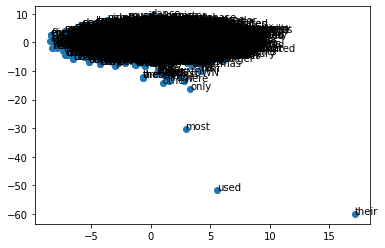

In [5]:
analogies_to_try = (
    ('king', 'man', 'woman'),
    ('france', 'paris', 'london'),
    ('france', 'paris', 'rome'),
    ('paris', 'france', 'italy'),
)

not_found = False
for word_list in analogies_to_try:
    for w in word_list:
        if w not in word2idx:
            print(f'{w} not found in vocab list')
            not_found = True
if not_found:
    exit()

#build term document matrix
V = len(word2idx)
N = len(sentences)

#create raw count first
A = np.zeros((V, N))
print("V:", V, "N:", N)
j=0
for sentence in sentences:
    for i in sentence:
        A[i,j] += 1
    j += 1
print("Finished getting raw counts...")

transformer = TfidfTransformer()

#tsne requires a dense array
#A = A.toarray()
#A = A.todense()

#map back to word in plot
#idx2word = {v:k for k, v in iteritems(word2idx)}
idx2word = {v:k for k, v in word2idx.items()}

print('Ready to plot...')

#plot the data in 2-D (TSNE plot)
tsne = TSNE()
Z = tsne.fit_transform(A)
plt.figure(figsize=(10,8))
plt.scatter(Z[:,0], Z[:,1])
for i in range(V):
    try:
        plt.annotate(s=idx2word[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]))
    except:
        print("bad string:", idx2word[i])
plt.draw()

Closest match by euclidean distance: START
king - man = START - woman
Closest match by cosine distance: kings
king - man = kings - woman
Closest match by euclidean distance: START
france - paris = START - london
Closest match by cosine distance: in
france - paris = in - london
Closest match by euclidean distance: START
france - paris = START - rome
Closest match by cosine distance: italy
france - paris = italy - rome
Closest match by euclidean distance: START
paris - france = START - italy
Closest match by cosine distance: italian
paris - france = italian - italy


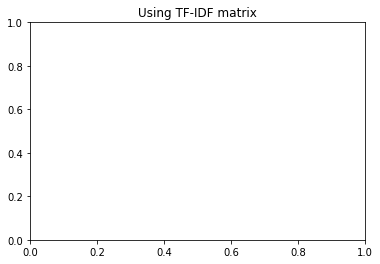

In [6]:
#multiple ways to create vectors for each word

# 1. Simply set it to the TF-IDF matrix
We = A

for word_list in analogies_to_try:
    w1, w2, w3 = word_list
    find_analogies(w1, w2, w3, We, word2idx, idx2word)
plt.title('Using TF-IDF matrix')
plt.show()



Closest match by euclidean distance: south
king - man = south - woman
Closest match by cosine distance: command
king - man = command - woman
Closest match by euclidean distance: tv
france - paris = tv - london
Closest match by cosine distance: football
france - paris = football - london
Closest match by euclidean distance: spanish
france - paris = spanish - rome
Closest match by cosine distance: spanish
france - paris = spanish - rome
Closest match by euclidean distance: head
paris - france = head - italy
Closest match by cosine distance: duke
paris - france = duke - italy


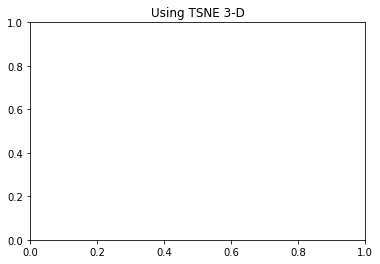

In [7]:
# 2. create higher dimension plot
tsne = TSNE(n_components=3)
We = tsne.fit_transform(A)

for word_list in analogies_to_try:
    w1, w2, w3 = word_list
    find_analogies(w1, w2, w3, We, word2idx, idx2word)
plt.title('Using TSNE 3-D')
plt.show()



Closest match by euclidean distance: royal
king - man = royal - woman
Closest match by cosine distance: royal
king - man = royal - woman
Closest match by euclidean distance: england
france - paris = england - london
Closest match by cosine distance: york
france - paris = york - london
Closest match by euclidean distance: germany
france - paris = germany - rome
Closest match by cosine distance: germany
france - paris = germany - rome
Closest match by euclidean distance: START
paris - france = START - italy
Closest match by cosine distance: heart
paris - france = heart - italy


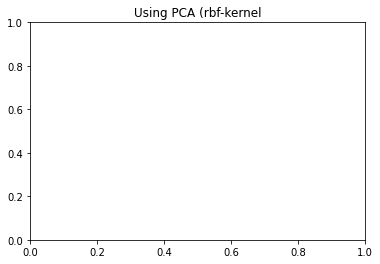

In [8]:
# 3. Use classic dimensionality reduction technique 
svd = KernelPCA(n_components=20, kernel='rbf')
We = svd.fit_transform(A)

for word_list in analogies_to_try:
    w1, w2, w3 = word_list
    find_analogies(w1, w2, w3, We, word2idx, idx2word)
plt.title('Using PCA (rbf-kernel')    
plt.show()